
# Modeling: binary classification


<h2> Table of contents </h2>

0. [Introduction](#Introduction)
1. [Import of packages](#Packages)
2. [Import of functions](#Functions)
3. [Modeling](#Modeling)
    1. [Import of data](#Data)
    2. [Split of data](#Split)
    3. [Training](#Training)
        1. [LightGBM](#LGBM)
        2. [Random Forest](#Random)
        3. [SVM](#SVM)
4. [Evaluation](#Evaluation)
    1. [LightGBM](#LGBMEvaluation)
    2. [Random Forest](#RandomForestEvaluation)
    3. [SVM](#SVMEvaluation)


<section id="Introduction">
    <h2> 0. Introduction </h2>
</section>


This is a file with functions that aim to facilitate the performance analysis of models. As output, the functions provide graphs, metrics, and basic tables used in the analysis process. Pay attention to the functions parameters:

- **final_model**: developed model
    > Save as **final_model_*type***

&nbsp;

- **model**: type of developed model:
    - **lgbm**: Light Gradient Boosting Machine;
    - **loglin**: Linear Regression;
    - **logreg**: Logistic Regression;

&nbsp;

- **X**: test or validation database;

&nbsp;

- **y**: test or validation target;


---



<section id="Packages">
    <h2> 1. Import of packages </h2>
<section id="Packages">
    

In [10]:
#!pip install PySimpleGUI

In [11]:
from sklearn.datasets import load_breast_cancer

import joblib
from fast_ml.model_development import train_valid_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# graphics ands tables
from scipy import stats
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics

from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# interative interface
import ipywidgets as widgets
from IPython.display import display


---



<section id="Functions">
   <h2> 2. Import of functions </h2>
<section id="Functions">


In [15]:
import os
print(os.getcwd())

/home/744ef240-a25d-4872-a66e-1d945ea1adf7/model_analysis/jupyter_notebooks/evaluation


In [16]:
%run "/home/744ef240-a25d-4872-a66e-1d945ea1adf7/model_analysis/jupyter_notebooks/evaluation/model_analysis-evaluation-functions.ipynb"


---



<section id="Modeling">
    <h2> 3. Modeling </h2>
<section id="Modeling"> 
    


<section id="Data">
    <h3> 3.1. Import of data </h3>
<section id="Data"> 
    

In [20]:
X_origin, y_origin = load_breast_cancer(return_X_y=True, as_frame=True)

In [21]:
y_dataframe = pd.DataFrame(y_origin, columns=['target'])

In [22]:
df_origin = pd.concat([X_origin, y_dataframe], axis=1)

In [23]:
df_origin

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                   0.07871  ...          17.33           184.60      2019.0   
1                   0.05667  ...          23.41           158.80      1956.0   
2                   0.05999  ...          25.53           152.50      1709.0   
3                   0.09744  ...          26.50            98.87       567.7   
4                   0.05883  ...          16.67           152.20      1575.0   
..                      ...  ...            ...              ...         ...   
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
0                  0.2654          0.4601                  0.11890       0  
1                  0.1860          0.2750                  0.08902       0  
2                  0.2430          0.3613                  0.08758       0  
3                  0.2575          0.6638                  0.17300       0  
4                  0.1625          0.2364                  0.076


<section id="Split">
    <h3> 3.1. Split of data </h3>
<section id="Split"> 
    

In [25]:
X_train, y_train, X_validation, y_validation, X_test, y_test = train_valid_test_split(df_origin,
                                                        target = 'target',
                                                        train_size=0.8,
                                                        valid_size=0.1,
                                                        test_size=0.1)


<section id="Training">
    <h3> 3.1. Training </h3>
<section id="Training"> 
    


<section id="LGBM">
    <h4> 3.1.1. LightGBM </h4>
<section id="LGBM"> 
    

In [ ]:
final_model_lgbm = LGBMClassifier(random_state=3)
final_model_lgbm.fit(X_train, y_train)

y_pred_test_lgbm = final_model_lgbm.predict_proba(X_test)
y_pred_validation_lgbm = final_model_lgbm.predict_proba(X_validation)


<section id="RandomForest">
    <h4> 3.1.2. Random Forest </h4>
<section id="RandomForest"> 
    

In [45]:
final_model_rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_leaf=5, random_state=3)
final_model_rf.fit(X_train, y_train)

y_pred_test_rf = final_model_rf.predict_proba(X_test)
y_pred_validation_rf = final_model_rf.predict_proba(X_validation)


<section id="SVM">
    <h4> 3.1.3. SVM </h4>
<section id="SVM"> 
    

In [70]:
final_model_svm = SVC(kernel='linear', random_state=3, probability=True)

final_model_svm.fit(X_train, y_train)

y_pred_test_svm = final_model_svm.predict_proba(X_test)
y_pred_validation_svm = final_model_svm.predict_proba(X_validation)


---



<section id="Evaluation">
    <h2> 4. Evaluation </h2>
<section id="Evaluation"> 
    


<section id="LGBMEvaluation">
    <h3> 3.1.1. LightGBM </h3>
<section id="LGBMEvaluation"> 
    

In [49]:
y_validation_proba = y_pred_validation_lgbm[:,1]

ROC AUC:  94.18158567774937
PR AUC:  0.9654946189001916
Confusion matrix:
[[0.36842105 0.03508772]
 [0.01754386 0.57894737]]


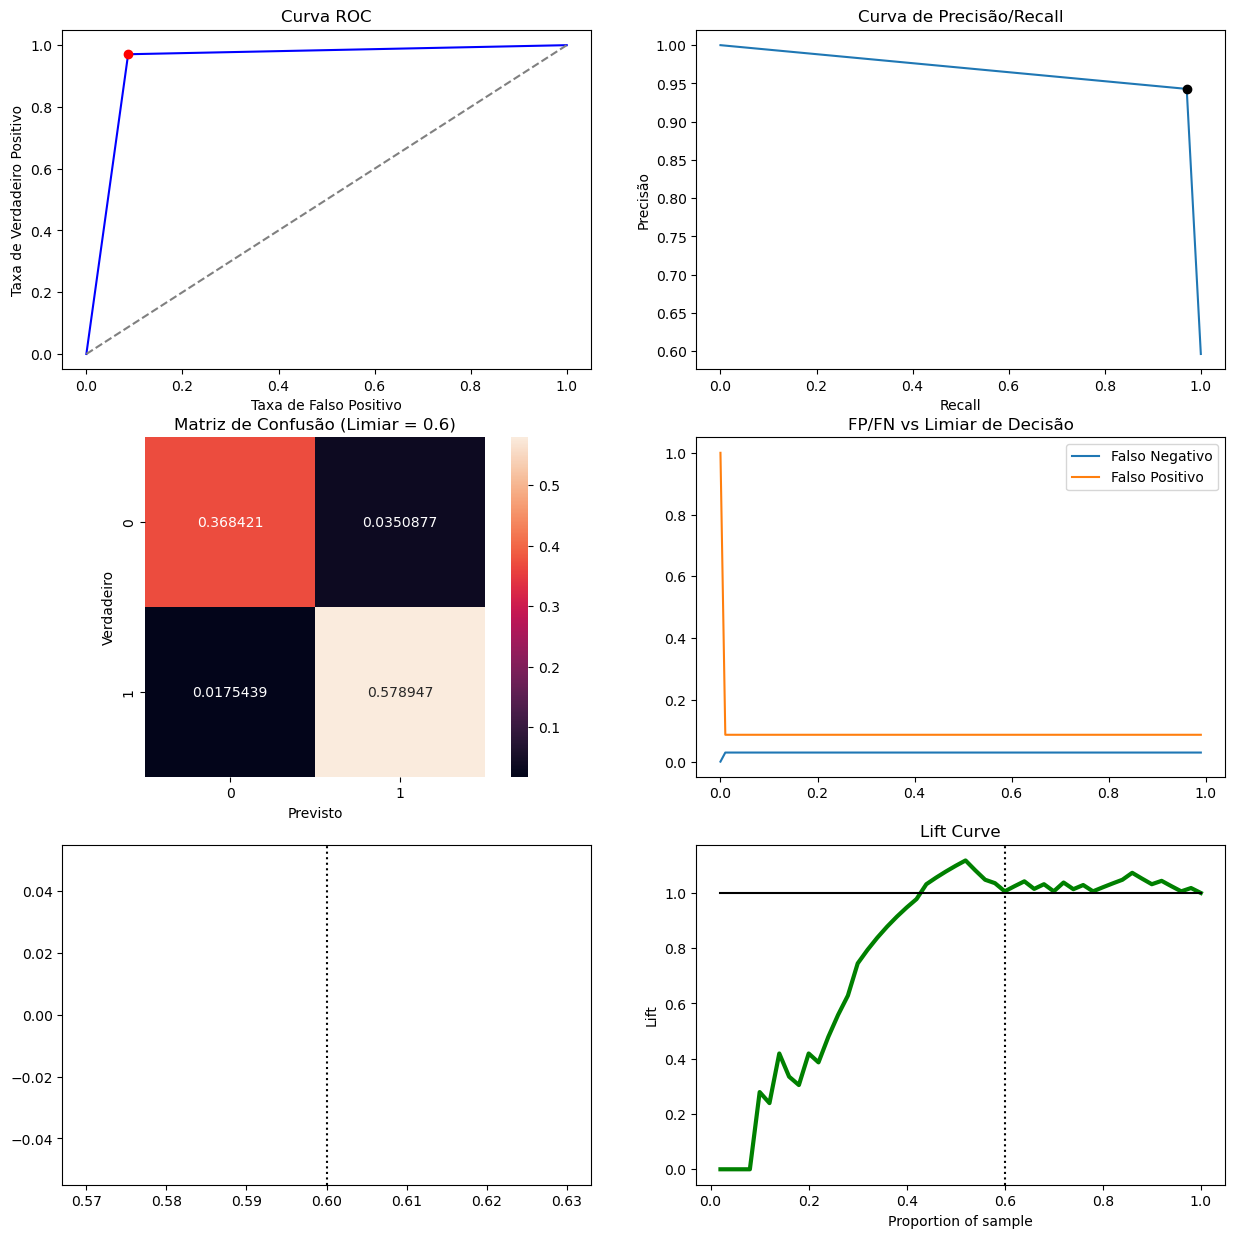

In [51]:
evaluation_BinaryClassification_graphs('lgbm', y_validation, 0.6, X_validation)

In [53]:
evaluation_BinaryClassification_tables('lgbm', final_model_lgbm, X_validation, y_validation,
                                       data=pd.DataFrame({'target': y_validation, 'predict': y_validation_proba}),
                                       target='target', prob='predict')

lgbm EVALUATION - GINI, KS E ANÁLISES DE EVENTOS:
KS : 0.88, GINI : 0.96

 lgbm EVALUATION - MÉTRICAS POR DECIS:


(         min_prob   max_prob  events  nonevents event_rate nonevent_rate
 Decile                                                                  
 1       99.99836%  99.99837%       6          0     17.65%         0.00%
 2       99.99807%  99.99832%       6          0     17.65%         0.00%
 3       99.99672%  99.99792%       5          0     14.71%         0.00%
 4       99.99476%  99.99672%       6          0     17.65%         0.00%
 5       99.98335%  99.99392%       4          1     11.76%         4.35%
 6       99.71107%  99.98212%       5          1     14.71%         4.35%
 7        0.26460%  98.64815%       2          4      5.88%        17.39%
 8        0.00602%   0.08471%       0          5      0.00%        21.74%
 9        0.00419%   0.00590%       0          6      0.00%        26.09%
 10       0.00281%   0.00397%       0          6      0.00%        26.09%,
         y       y_pred_proba      rel_acc bons_acc rel_pct nrel_pct    ifp  \
       sum count          min  m


<section id="RandomForestEvaluation">
    <h3> 3.1.2. Random Forest </h3>
<section id="RandomForestEvaluation"> 
    

In [55]:
y_validation_proba = y_pred_validation_lgbm[:,1]

ROC AUC:  94.18158567774937
PR AUC:  0.9654946189001916
Confusion matrix:
[[0.36842105 0.03508772]
 [0.01754386 0.57894737]]


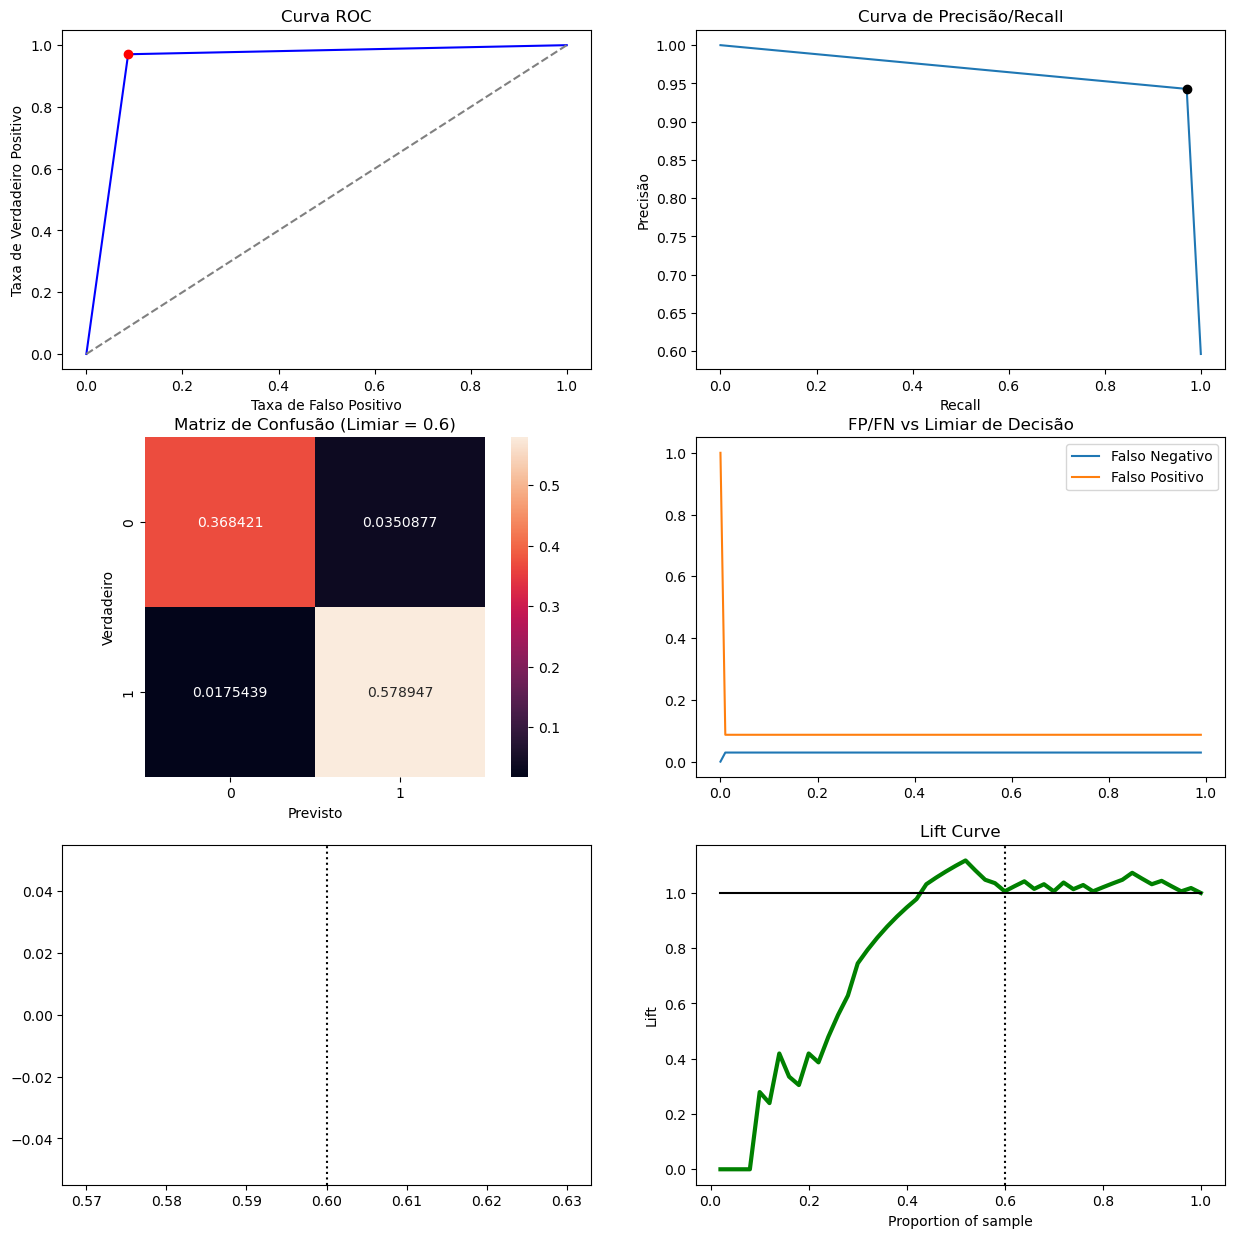

In [57]:
evaluation_BinaryClassification_graphs('rf', y_validation, 0.6, X_validation)

In [65]:
evaluation_BinaryClassification_tables('rf', final_model_rf, X_validation, y_validation,
                                       data=pd.DataFrame({'target': y_validation, 'predict': y_validation_proba}),
                                       target='target', prob='predict')

rf EVALUATION - GINI, KS E ANÁLISES DE EVENTOS:
KS : 0.88, GINI : 0.96

 rf EVALUATION - MÉTRICAS POR DECIS:


(         min_prob   max_prob  events  nonevents event_rate nonevent_rate
 Decile                                                                  
 1       99.99836%  99.99837%       6          0     17.65%         0.00%
 2       99.99807%  99.99832%       6          0     17.65%         0.00%
 3       99.99672%  99.99792%       5          0     14.71%         0.00%
 4       99.99476%  99.99672%       6          0     17.65%         0.00%
 5       99.98335%  99.99392%       4          1     11.76%         4.35%
 6       99.71107%  99.98212%       5          1     14.71%         4.35%
 7        0.26460%  98.64815%       2          4      5.88%        17.39%
 8        0.00602%   0.08471%       0          5      0.00%        21.74%
 9        0.00419%   0.00590%       0          6      0.00%        26.09%
 10       0.00281%   0.00397%       0          6      0.00%        26.09%,
         y       y_pred_proba      rel_acc bons_acc rel_pct nrel_pct    ifp  \
       sum count          min  m


<section id="SVMEvaluation">
    <h3> 3.1.3. SVM </h3>
<section id="SVMEvaluation"> 
    

In [72]:
y_validation_proba = y_pred_validation_svm[:,1]

ROC AUC:  94.18158567774937
PR AUC:  0.9654946189001916
Confusion matrix:
[[0.36842105 0.03508772]
 [0.01754386 0.57894737]]


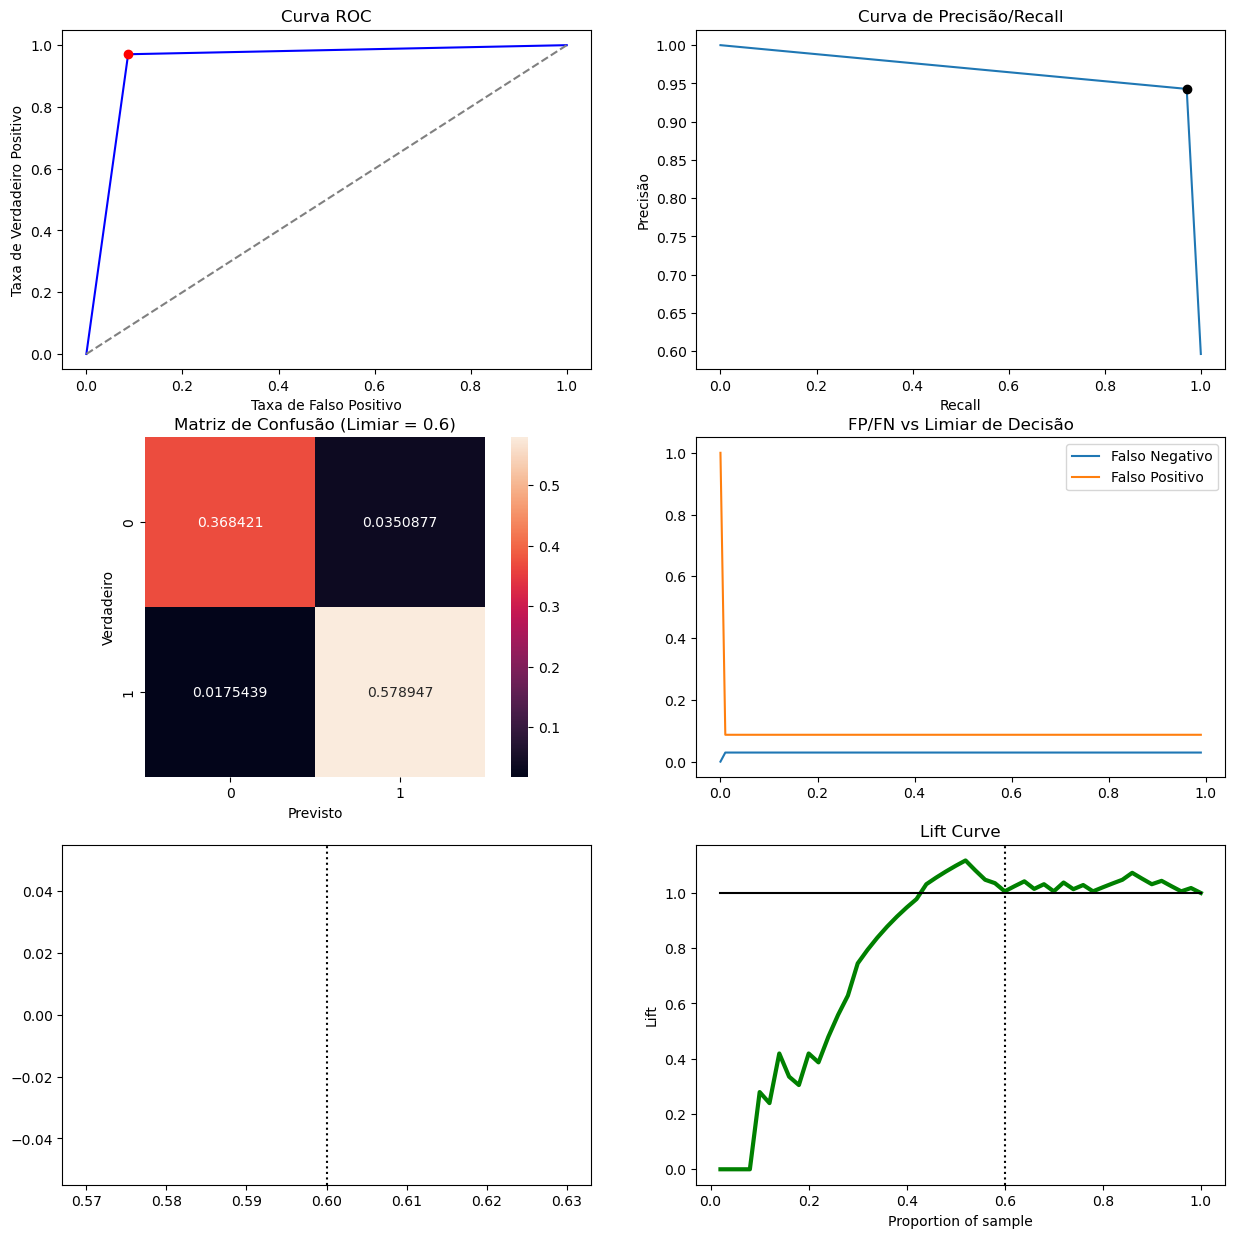

In [74]:
evaluation_BinaryClassification_graphs('svm', y_validation, 0.6, X_validation)

In [76]:
evaluation_BinaryClassification_tables('svm', final_model_svm, X_validation, y_validation,
                                       data=pd.DataFrame({'target': y_validation, 'predict': y_validation_proba}),
                                       target='target', prob='predict')

svm EVALUATION - GINI, KS E ANÁLISES DE EVENTOS:
KS : 0.96, GINI : 0.95

 svm EVALUATION - MÉTRICAS POR DECIS:


(         min_prob   max_prob  events  nonevents event_rate nonevent_rate
 Decile                                                                  
 1       99.99917%  99.99990%       6          0     17.65%         0.00%
 2       99.36810%  99.72535%       6          0     17.65%         0.00%
 3       98.67008%  99.01921%       4          1     11.76%         4.35%
 4       98.17399%  98.65617%       6          0     17.65%         0.00%
 5       96.16368%  98.17387%       5          0     14.71%         0.00%
 6       75.76059%  95.80792%       6          0     17.65%         0.00%
 7        4.87088%  13.47672%       0          5      0.00%        21.74%
 8       23.77874%  61.83925%       1          5      2.94%        21.74%
 9        0.07660%   2.94148%       0          6      0.00%        26.09%
 10       0.00049%   0.05681%       0          6      0.00%        26.09%,
         y       y_pred_proba      rel_acc bons_acc rel_pct nrel_pct    ifp  \
       sum count          min  m